# Interpolation and extrapolation in ML

**Extrapolation** is an estimation of a value based on extending a known sequence of values or facts beyond the area that is certainly known. In a general sense, to extrapolate is to infer something that is not explicitly stated from existing information.

**Interpolation** is an estimation of a value within two known values in a sequence of values. Polynomial interpolation is a method of estimating values between known data points. When graphical data contains a gap, but data is available on either side of the gap or at a few specific points within the gap, interpolation allows us to estimate the values within the gap.


![](https://lh3.googleusercontent.com/proxy/t1asscECqXTFvybHep7NLiqLvZUxd8PmmR7rEVt_tKwW8pFR1JZ1s35DJXWjJKfJOJXnzJV14eeU4vcq4z0Tuxf0s1-Eto2PWCznRHwq9dJ46QNBVS9gOtyIUl65a_0kUgQvtIg3u2fh-XSg)

![](https://i.ytimg.com/vi/gbND5b0F8zc/maxresdefault.jpg)

# How to draw a curve into the dataset

Curve fitting is the process of constructing a curve, or mathematical function, that has the best fit to a series of data points, possibly subject to constraints. Curve fitting can involve either interpolation, where an exact fit to the data is required, or smoothing, in which a "smooth" function is constructed that approximately fits the data. A related topic is regression analysis, which focuses more on questions of statistical inference such as how much uncertainty is present in a curve that is fit to data observed with random errors. Fitted curves can be used as an aid for data visualization, to infer values of a function where no data are available, and to summarize the relationships among two or more variables. Extrapolation refers to the use of a fitted curve beyond the range of the observed data,and is subject to a degree of uncertainty since it may reflect the method used to construct the curve as much as it reflects the observed data.

![](https://mathleaks.com/mediawiki/images/6/6d/Basic_char_graph_of_polynomial_functions.svg)

Referenece:

- [Curve fitting](https://en.wikipedia.org/wiki/Curve_fitting#:~:text=A%20line%20will%20connect%20any,points%20with%20distinct%20x%20coordinates.&text=This%20will%20exactly%20fit%20a%20simple%20curve%20to%20three%20points.&text=Angle%20and%20curvature%20constraints%20are,cases%20are%20called%20end%20conditions.)

# Example

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style="whitegrid")

In [4]:
data = pd.read_excel("polynomial  sample data.xlsx")

In [5]:
data

,X,Y
0,5,28
1,15,11
2,25,2
3,34,9
4,43,29
5,55,30


C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

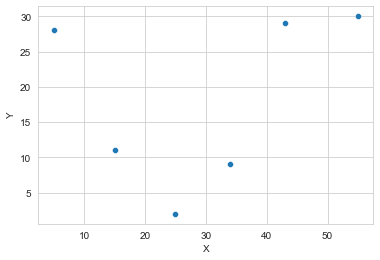

In [8]:
sns.scatterplot(data["X"],data["Y"])

C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


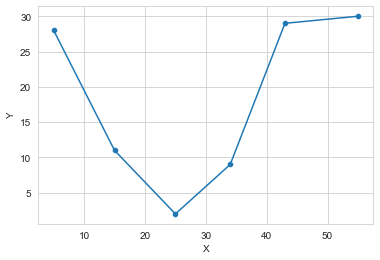

In [9]:
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],data["Y"])
plt.show()

In [33]:
X = data[["X"]]
y = data["Y"]

from sklearn.linear_model import LinearRegression

mdl = LinearRegression()
mdl.fit(X,y)

LinearRegression()

In [34]:
mdl.coef_

array([0.2034452])

In [35]:
mdl.intercept_

12.165033165033169

**y = 12.165033165033169 + 0.2034452 X (Polynomial equation with degree = 1)**

In [36]:
y_pred = mdl.predict(X)

C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


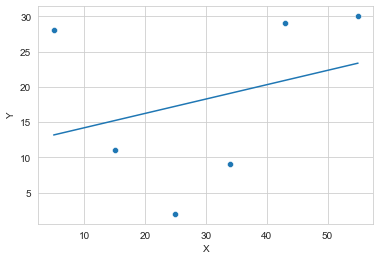

In [37]:
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred)
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
print(f"RMSE = {np.sqrt(mean_squared_error(y,y_pred))}")

RMSE = 10.654837329849691


# Polynomial regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly_regf = PolynomialFeatures(degree=3)

In [41]:
poly_regf

PolynomialFeatures(degree=3)

In [42]:
poly_regf.fit(X)

PolynomialFeatures(degree=3)

In [43]:
X_poly = poly_regf.transform(X)

In [44]:
X_poly # x3+x2+4x+1

array([[1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02],
       [1.00000e+00, 1.50000e+01, 2.25000e+02, 3.37500e+03],
       [1.00000e+00, 2.50000e+01, 6.25000e+02, 1.56250e+04],
       [1.00000e+00, 3.40000e+01, 1.15600e+03, 3.93040e+04],
       [1.00000e+00, 4.30000e+01, 1.84900e+03, 7.95070e+04],
       [1.00000e+00, 5.50000e+01, 3.02500e+03, 1.66375e+05]])

In [45]:
X_poly = poly_regf.fit_transform(X) # fit & transform together

In [46]:
mdl_poly = LinearRegression()
mdl_poly.fit(X_poly,y)

LinearRegression()

In [47]:
mdl_poly.coef_

array([ 0.00000000e+00, -5.29094823e+00,  1.75068180e-01, -1.55748430e-03])

In [48]:
mdl_poly.intercept_

51.76860925828218

In [49]:
y_pred_poly = mdl_poly.predict(X_poly)

In [50]:
from sklearn.metrics import mean_squared_error
print(f"RMSE = {np.sqrt(mean_squared_error(y,y_pred_poly))}")

RMSE = 3.423771112959535


C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


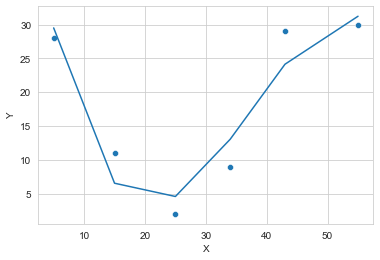

In [51]:
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred_poly)
plt.show()

C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Milan B

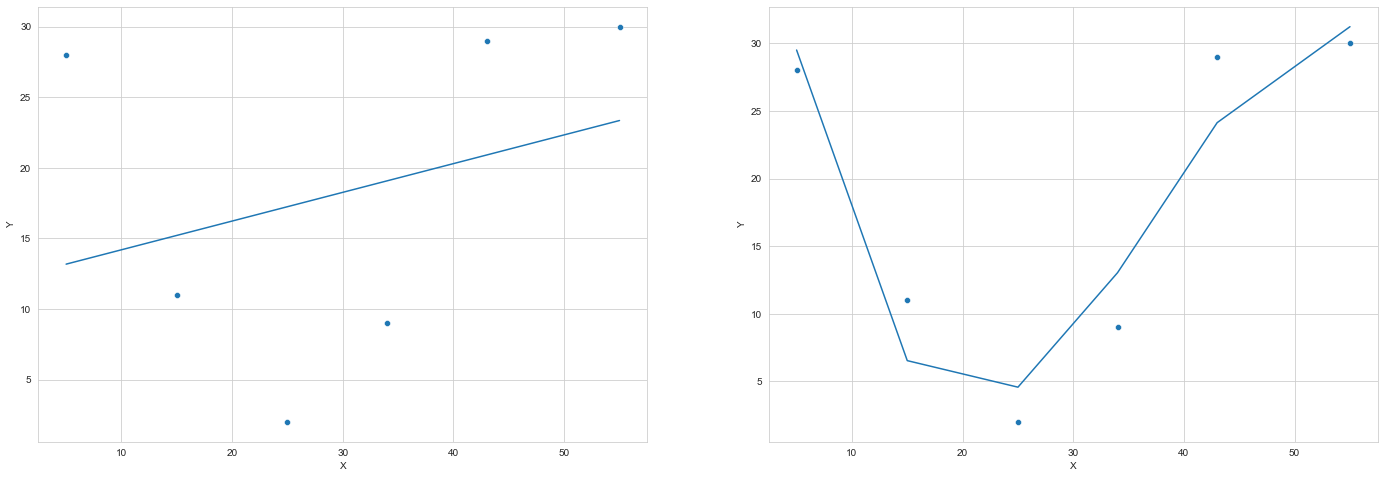

In [54]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred)

plt.subplot(1,2,2)
sns.scatterplot(data["X"],data["Y"])
sns.lineplot(data["X"],y_pred_poly)
plt.show()

# Finding a  best parameter (Grid search)

C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Milan B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Milan B

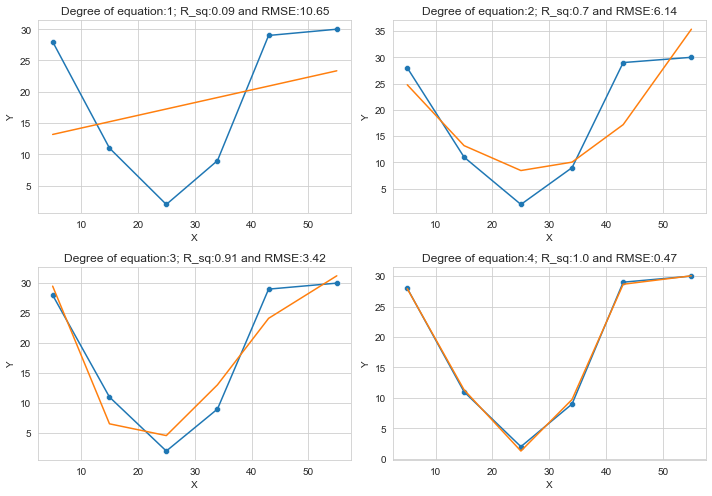

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(10,7))

for i in range(1,5):
    poly_regf = PolynomialFeatures(degree=i)
    X_poly = poly_regf.fit_transform(X)
    mdl_poly = LinearRegression()
    mdl_poly.fit(X_poly,y)
    y_pred_poly = mdl_poly.predict(X_poly)
    
    rmse = round(np.sqrt(mean_squared_error(y,y_pred_poly)),2)
    r2 = round(r2_score(y,y_pred_poly),2)
    
    
    plt.subplot(2,2,i)
    sns.scatterplot(data["X"],data["Y"])
    sns.lineplot(data["X"],data["Y"])
    sns.lineplot(data["X"],y_pred_poly)
    plt.title(f"Degree of equation:{i}; R_sq:{r2} and RMSE:{rmse}")
    
plt.tight_layout()
plt.show()

# Polynomial regression on BOSTON housing data

In [70]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings   
warnings.filterwarnings('ignore')

boston_dataset = load_boston()

In [71]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [72]:
print(boston_dataset["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [73]:
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston["MEDV"] = boston_dataset.target

In [74]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

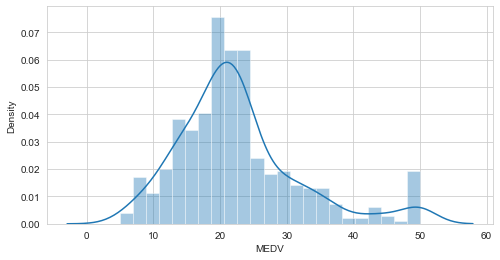

In [75]:
# Look at how the prices are distributed
plt.figure(figsize=(8,4))
sns.distplot(boston.MEDV)

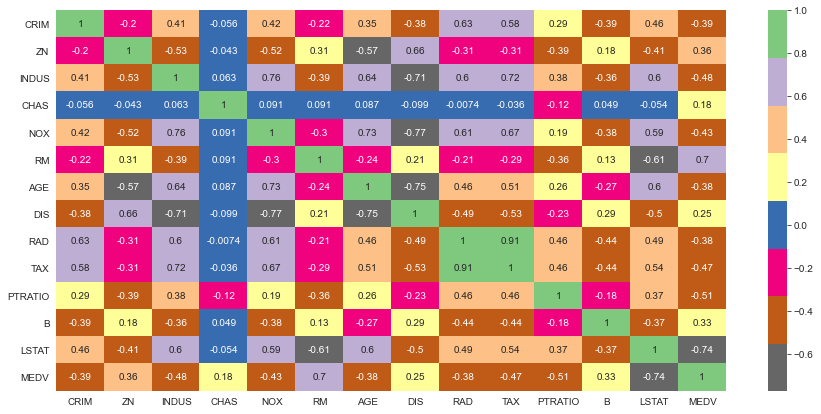

In [76]:
plt.figure(figsize=(15,7))
corr_mat = boston.corr()

sns.heatmap(corr_mat,annot=True,cmap='Accent_r')
plt.show()

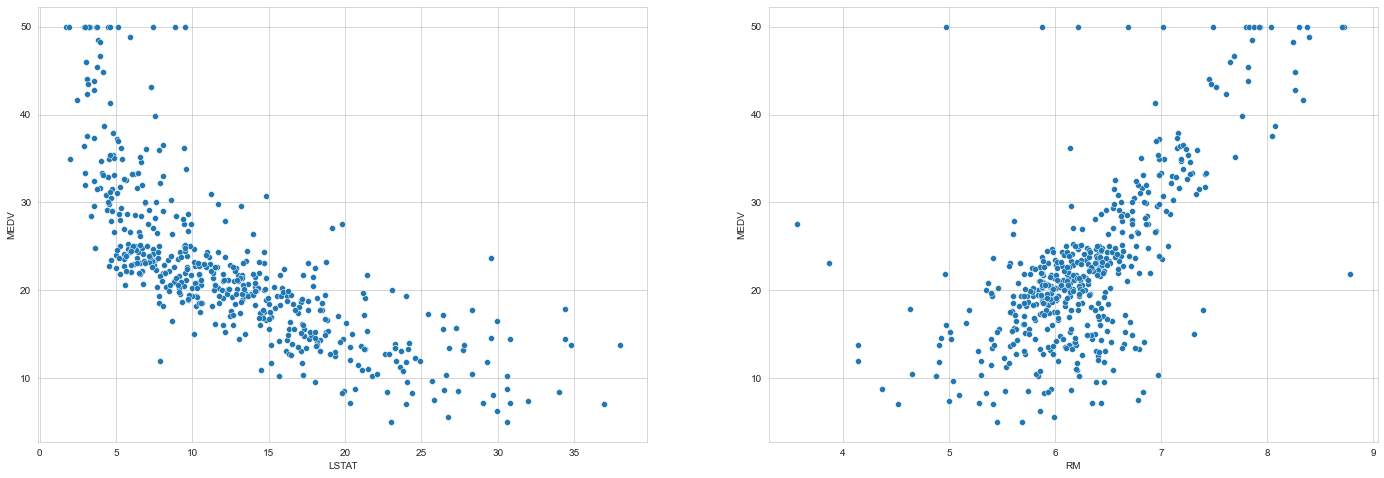

In [77]:
plt.figure(figsize=(24,8))
plt.subplot(1,2,1)
sns.scatterplot(boston.LSTAT,boston.MEDV)

plt.subplot(1,2,2)
sns.scatterplot(boston.RM,boston.MEDV);

In [69]:
X = boston[["RM","LSTAT"]]
y = boston["MEDV"]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=45)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
print(f"Intercept.{lm.fit_intercept}")
print(f"coeff.{lm.coef_}")

Intercept.True
coeff.[ 4.92795043 -0.63979578]


In [83]:
# Evaluation of model

Y_train_pred = lm.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,Y_train_pred))
Rsqr_train = r2_score(y_train,Y_train_pred)

print('Evaluation metrics for Training Dataset')
print('-'*40)
print('RMSE is: ',rmse_train)
print('RSquared is: ',Rsqr_train*100)

print('\n')

Y_test_pred = lm.predict(X_test)
rmse_test =  np.sqrt(mean_squared_error(y_test,Y_test_pred))
Rsqr_test = r2_score(y_test,Y_test_pred)


print('Evaluation metrics for Testing Dataset')
print('-'*40)
print('RMSE is: ',rmse_test)
print('RSquared is: ',Rsqr_test*100)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  5.351976166303716
RSquared is:  63.43676895938572


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  6.165806324221945
RSquared is:  64.82431532229032


In [92]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(degree,X_train, X_test, y_train, y_test):
    poly_regf = PolynomialFeatures(degree=degree)
    
    X_poly = poly_regf.fit_transform(X_train)
    
    mdl_poly = LinearRegression()
    mdl_poly.fit(X_poly,y_train)
    
   
    Y_train_pred = mdl_poly.predict(X_poly)
    rmse_train = np.sqrt(mean_squared_error(y_train,Y_train_pred))
    Rsqr_train = r2_score(y_train,Y_train_pred)

    print('Evaluation metrics for Training Dataset')
    print('-'*40)
    print('RMSE is: ',rmse_train)
    print('RSquared is: ',Rsqr_train*100)

    print('\n')
    
    X_test_poly = poly_regf.transform(X_test)
    Y_test_pred = mdl_poly.predict(X_test_poly)
    rmse_test =  np.sqrt(mean_squared_error(y_test,Y_test_pred))
    Rsqr_test = r2_score(y_test,Y_test_pred)


    print('Evaluation metrics for Testing Dataset')
    print('-'*40)
    print('RMSE is: ',rmse_test)
    print('RSquared is: ',Rsqr_test*100)

In [93]:
polynomial_regression(1,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  5.351976166303716
RSquared is:  63.43676895938572


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  6.165806324221943
RSquared is:  64.82431532229033


In [94]:
polynomial_regression(2,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  4.553196798789354
RSquared is:  73.53639113883203


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  4.5173307808457706
RSquared is:  81.11893064423379


In [95]:
polynomial_regression(3,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  4.340525787742391
RSquared is:  75.95078489760057


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  5.902856318028501
RSquared is:  67.76057955363682


In [96]:
polynomial_regression(4,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  4.166007039471063
RSquared is:  77.84579223961896


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  6.664041171485372
RSquared is:  58.90981043057859


In [97]:
polynomial_regression(5,X_train, X_test, y_train, y_test)

Evaluation metrics for Training Dataset
----------------------------------------
RMSE is:  4.0459959098738265
RSquared is:  79.10381021162176


Evaluation metrics for Testing Dataset
----------------------------------------
RMSE is:  15.45379843624334
RSquared is:  -120.96998626369255
